In [2]:
from sklearn.datasets import load_wine
import pandas as pd
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
sy = pd.Series(wine.target, dtype="category")
sy = sy.cat.rename_categories(wine.target_names)
df['class'] = sy
df.tail()
print(df.index)

RangeIndex(start=0, stop=178, step=1)


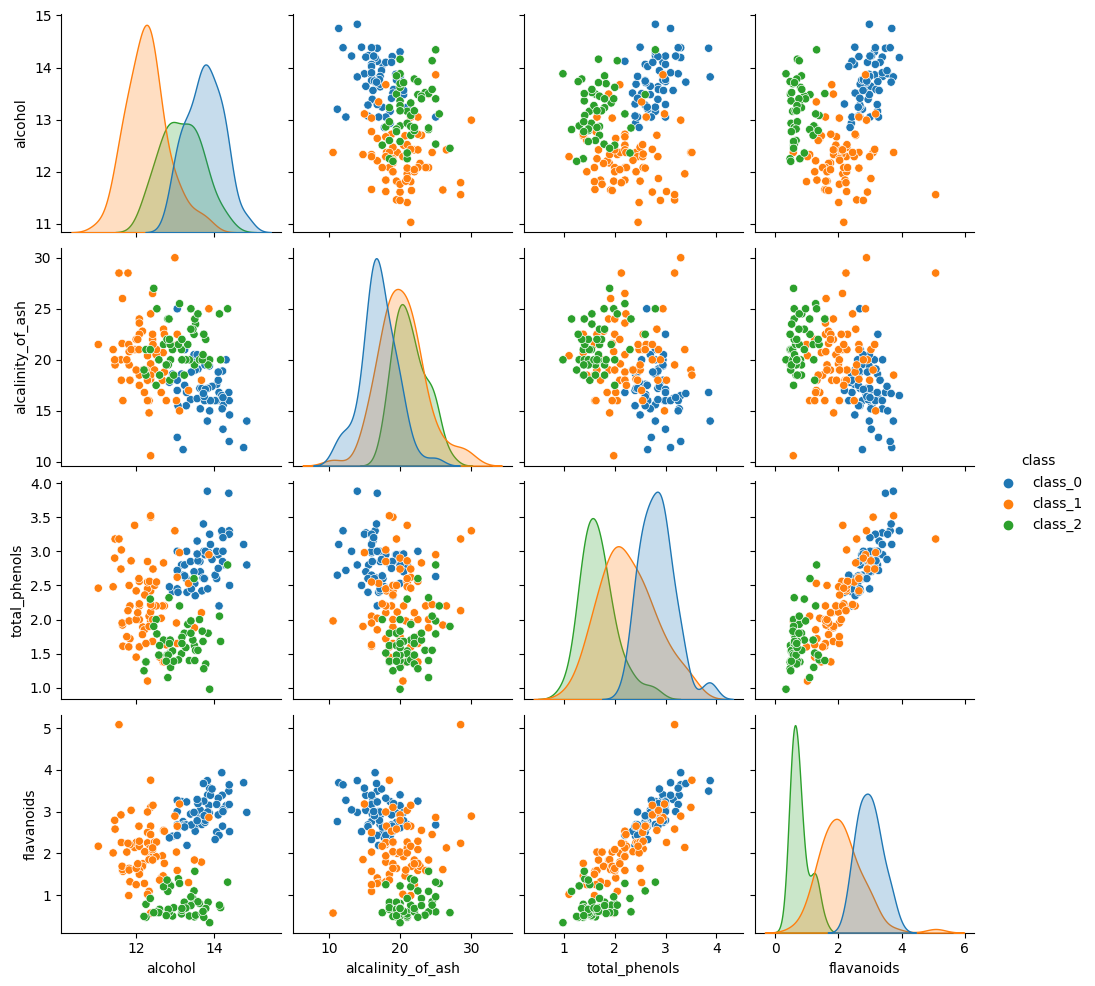

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(vars=["alcohol", "alcalinity_of_ash", "total_phenols", "flavanoids"], 
             hue="class", data=df)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
x_data = df.loc[:,'alcohol':'flavanoids']
y_data = df.loc[:,'class']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=20)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(142, 7) (142,)
(36, 7) (36,)


In [6]:
# 모델 학습 k=9일 때
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [7]:
y_knn_pred = knn.predict(x_test)
print("예측값:", y_knn_pred[:5])

예측값: ['class_1' 'class_2' 'class_0' 'class_2' 'class_1']


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [8]:
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test, y_knn_pred)
print(f"accuracy:{knn_acc}%")

accuracy:0.8333333333333334%


In [9]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)

SVC()

In [10]:
# 예측
y_svc_pred = svc.predict(x_test)
print("예측값:", y_svc_pred[:5])
# 성능평가
svc_acc = accuracy_score(y_test, y_knn_pred)
print("accuracy:%4f" % svc_acc)

예측값: ['class_1' 'class_1' 'class_0' 'class_0' 'class_1']
accuracy:0.833333


In [11]:
# 모델학습 
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(x_train, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
# 예측
y_lrc_pred = lrc.predict(x_test)
print("예측값:", y_lrc_pred[:5])
lrc_acc = accuracy_score(y_test, y_lrc_pred)
print("정확도:%4f" % lrc_acc)

예측값: ['class_1' 'class_2' 'class_0' 'class_1' 'class_2']
정확도:0.888889


In [13]:
y_lrc_prod = lrc.predict_proba(x_test)
y_lrc_prod

array([[5.39547214e-02, 9.36797093e-01, 9.24818563e-03],
       [1.45116473e-04, 2.09628427e-02, 9.78892041e-01],
       [9.87414145e-01, 1.25792790e-02, 6.57611990e-06],
       [3.97984564e-01, 5.35015658e-01, 6.69997780e-02],
       [1.82014877e-03, 4.65041487e-01, 5.33138364e-01],
       [1.75733862e-03, 8.96492067e-01, 1.01750594e-01],
       [3.34189616e-04, 1.63079075e-02, 9.83357903e-01],
       [4.14106296e-03, 7.96295909e-01, 1.99563028e-01],
       [6.98291964e-02, 9.28530144e-01, 1.64065981e-03],
       [6.04215152e-04, 4.24823029e-02, 9.56913482e-01],
       [9.42734047e-01, 5.72625681e-02, 3.38542633e-06],
       [2.67636008e-05, 4.88664823e-03, 9.95086588e-01],
       [3.49313735e-01, 6.50183588e-01, 5.02676606e-04],
       [7.81543224e-02, 8.83141713e-01, 3.87039647e-02],
       [9.99531157e-01, 4.68821082e-04, 2.21761185e-08],
       [6.20837993e-03, 5.97165700e-01, 3.96625920e-01],
       [4.42111371e-04, 8.16487993e-01, 1.83069896e-01],
       [8.04788696e-01, 1.95030

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3, random_state=20)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=20)

In [15]:
# 예측
y_dtc_pred = dtc.predict(x_test)
print("예측값:", y_dtc_pred[:5])
# 성능평가
dtc_acc = accuracy_score(y_test, y_dtc_pred)
print("정확도:%4f" % dtc_acc)

예측값: ['class_1' 'class_2' 'class_0' 'class_1' 'class_2']
정확도:0.916667


In [16]:
# hard Voting 모델 학습 및 예측
from sklearn.ensemble import VotingClassifier
hvc = VotingClassifier(estimators=[('KNN', knn), ('SVM', svc), ('DT',dtc)], voting='hard')
hvc.fit(x_train, y_train)
# 예측
y_hvc_pred = hvc.predict(x_test)
print("예측값", y_hvc_pred[:5])
# 성능평가
hvc_acc = accuracy_score(y_test, y_hvc_pred)
print("정확도:%4f" % hvc_acc)
# voting 옵션에 soft를 사용하면 3개의 모델의 각 분류 클래스별 예측 확률(0~1사이)을 평균하여 최종분류 클래스를 정한다.
# 3개중에서 가장 큰 확률을 갖는 클래스를 선택한다.

예측값 ['class_1' 'class_2' 'class_0' 'class_0' 'class_1']
정확도:0.861111


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=20)
rfc.fit(x_train, y_train)
# 예측
y_rfc_pred = rfc.predict(x_test)
print("예측값:", y_rfc_pred[:5])
# 모델 성능 평가
rfc_acc = accuracy_score(y_test, y_rfc_pred)
print("정확도:%4f" % rfc_acc)

예측값: ['class_1' 'class_2' 'class_0' 'class_1' 'class_1']
정확도:0.944444


In [18]:
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.3, shuffle=True, random_state=20)
print(x_tr.shape, y_tr.shape)
print(x_val.shape, y_val.shape)

(99, 7) (99,)
(43, 7) (43,)


In [19]:
# 학습
rfc = RandomForestClassifier(max_depth=3, random_state=20)
rfc.fit(x_tr, y_tr)
# 예측
y_tr_pred = rfc.predict(x_tr)
y_val_pred = rfc.predict(x_val)
# 검증
tr_acc = accuracy_score(y_tr, y_tr_pred)
val_acc = accuracy_score(y_val, y_val_pred)
print("트레인 정확도:%4f" % tr_acc)
print("val정확도 :%4f" % val_acc)

트레인 정확도:0.989899
val정확도 :0.976744


In [20]:
# 테스트 데이터 예측 및 평가
y_test_pred = rfc.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("test 정확도 : %4f" % test_acc)

test 정확도 : 0.944444


In [21]:
# 데이터셋을 5개의 Fold로 분할하는 KFold 클래스 객체 생성
from sklearn.model_selection import KFold
kFold = KFold(n_splits=5, shuffle=True, random_state=20)
# 훈련용 데이터와 검즈용 데이터의 행 인덱스를 각 Fold별로 구분하여 생성
num_foid = 1
for tr_idx, val_idx, in kFold.split(x_train):
    print("%s Fold---------------------" % num_foid)
    print("훈련:", len(tr_idx), tr_idx[:10])
    print("검증:", len(val_idx), val_idx[:10])
    num_foid = num_foid +1

1 Fold---------------------
훈련: 113 [ 2  3  4  5  6  7  8  9 10 12]
검증: 29 [ 0  1 11 20 34 37 46 49 54 64]
2 Fold---------------------
훈련: 113 [ 0  1  3  4  6  7  8 10 11 13]
검증: 29 [ 2  5  9 12 21 23 28 35 38 39]
3 Fold---------------------
훈련: 114 [ 0  1  2  3  5  6  7  9 10 11]
검증: 28 [ 4  8 14 19 27 30 31 36 48 52]
4 Fold---------------------
훈련: 114 [0 1 2 3 4 5 6 7 8 9]
검증: 28 [10 17 18 24 29 32 33 42 43 45]
5 Fold---------------------
훈련: 114 [ 0  1  2  4  5  8  9 10 11 12]
검증: 28 [ 3  6  7 13 15 16 22 25 26 40]


In [22]:
# 랜덤 포레스트 모델을 K-fold 교차 검증으로 평가한다. 
# 각 폴드의 모델 성능을 평가한 결과물을 보면 1번 폴드의 정확도가 낮은 편이다.
# 훈련용 데이터와 검증용 데이터의 행 인덱스를 각 Fold별로 구분하여 생성 
val_scores = []
num_foid = 1
for tr_idx, val_idx in kFold.split(x_train, y_train):
    # 훈련용 데이터와 검즈용 데이터를 행 인덱스 기준으로 추출
    x_tr, x_val = x_train.iloc[tr_idx, :], x_train.iloc[val_idx, :]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]
    # 학습
    rfc = RandomForestClassifier(max_depth=5, random_state=20)
    rfc.fit(x_tr, y_tr)
    # 검증
    y_val_pred = rfc.predict(x_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    print("%d Fold 정확도 : %4f" % (num_foid, val_acc))
    val_scores.append(val_acc)
    num_foid += 1


1 Fold 정확도 : 0.931034
2 Fold 정확도 : 0.965517
3 Fold 정확도 : 0.928571
4 Fold 정확도 : 0.928571
5 Fold 정확도 : 0.964286


In [23]:
# 5개 폴드의 검증 정확도를 평균한다.
# 평균 Accuracy 계산
import numpy as np
mean_score = np.mean(val_scores)
print("평균검증 정확도 :", np.round(mean_score, 4))

평균검증 정확도 : 0.9436
